In [1]:
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/New folder/Project_2/Project 2/Healthcare - Diabetes/health care diabetes.csv')

In [2]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value


In [4]:
import numpy as np
dataset.replace(0,np.nan)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,NaN
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,NaN
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


In [5]:
dataset.duplicated().all()

False

2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

Text(0.5, 1.0, 'Outcome')

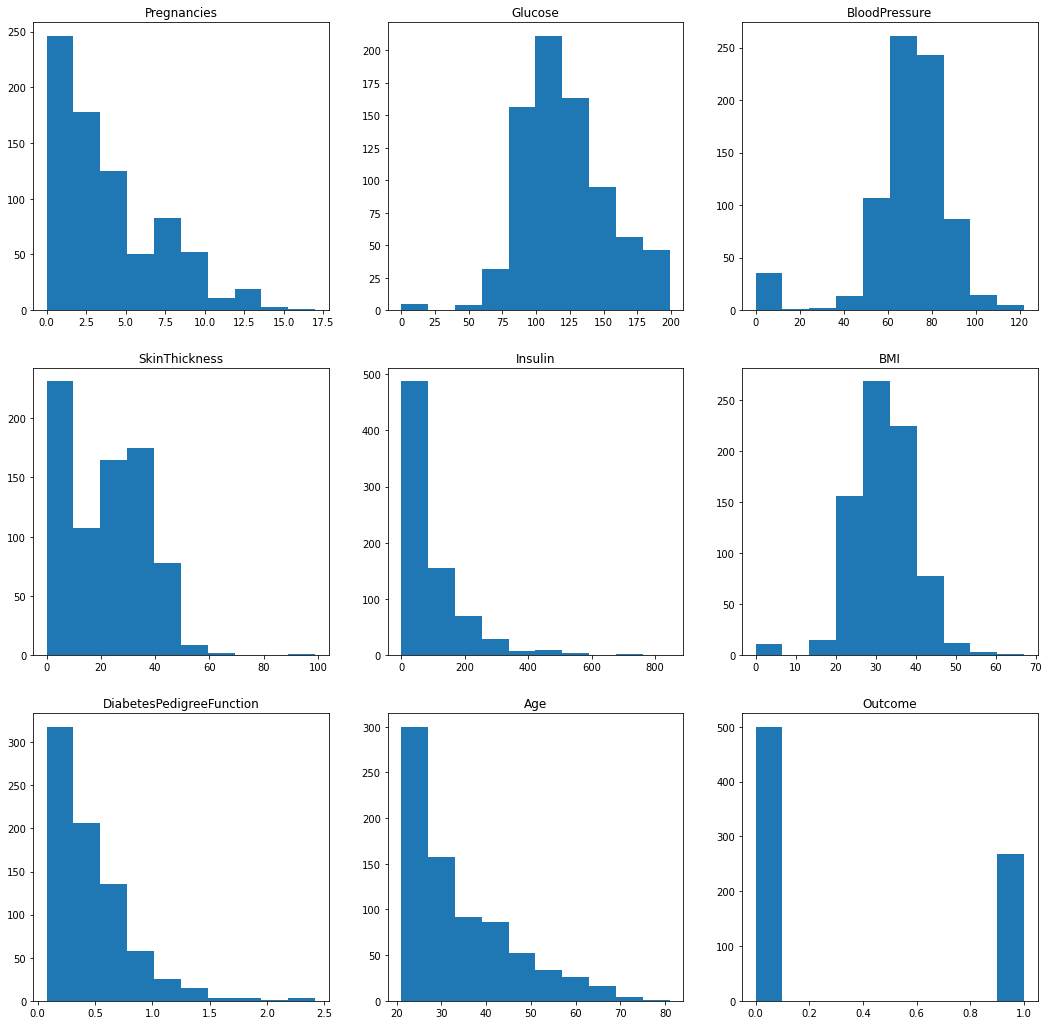

In [6]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(3,3,figsize=(18,18))
axes[0][0].hist(dataset.iloc[:,0])
axes[0][0].set_title(dataset.columns[0])
axes[0][1].hist(dataset.iloc[:,1])
axes[0][1].set_title(dataset.columns[1])
axes[0][2].hist(dataset.iloc[:,2])
axes[0][2].set_title(dataset.columns[2])
axes[1][0].hist(dataset.iloc[:,3])
axes[1][0].set_title(dataset.columns[3])
axes[1][1].hist(dataset.iloc[:,4])
axes[1][1].set_title(dataset.columns[4])
axes[1][2].hist(dataset.iloc[:,5])
axes[1][2].set_title(dataset.columns[5])
axes[2][0].hist(dataset.iloc[:,6])
axes[2][0].set_title(dataset.columns[6])
axes[2][1].hist(dataset.iloc[:,7])
axes[2][1].set_title(dataset.columns[7])
axes[2][2].hist(dataset.iloc[:,8])
axes[2][2].set_title(dataset.columns[8])

In [7]:
from sklearn.impute import SimpleImputer
new=SimpleImputer().fit_transform(dataset)

In [8]:
dataset=pd.DataFrame(new,columns=dataset.columns)
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
dataset['Age'].max()

81.0

We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

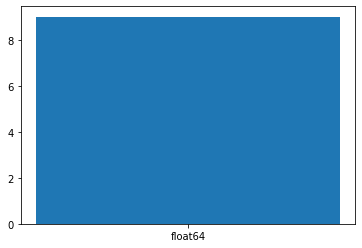

In [10]:
plt.bar('float64',dataset.dtypes.size,width=[0.6])
plt.show()

In [11]:
dataset.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

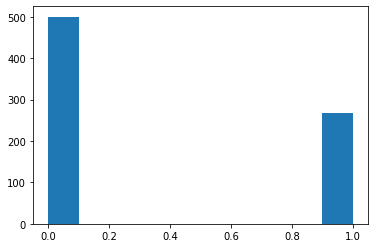

In [12]:
plt.hist(dataset.Outcome)
plt.show()

In [13]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
x=dataset.drop('Outcome',axis=1)
y=dataset['Outcome']

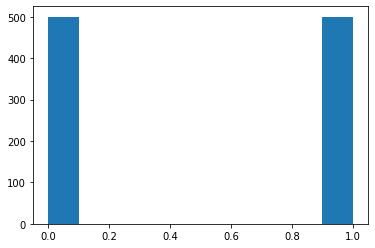

In [15]:
#balancing the data
from imblearn.over_sampling import SMOTE
x_,y_=SMOTE().fit_resample(x,y)

plt.hist(y_)
plt.show()

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.


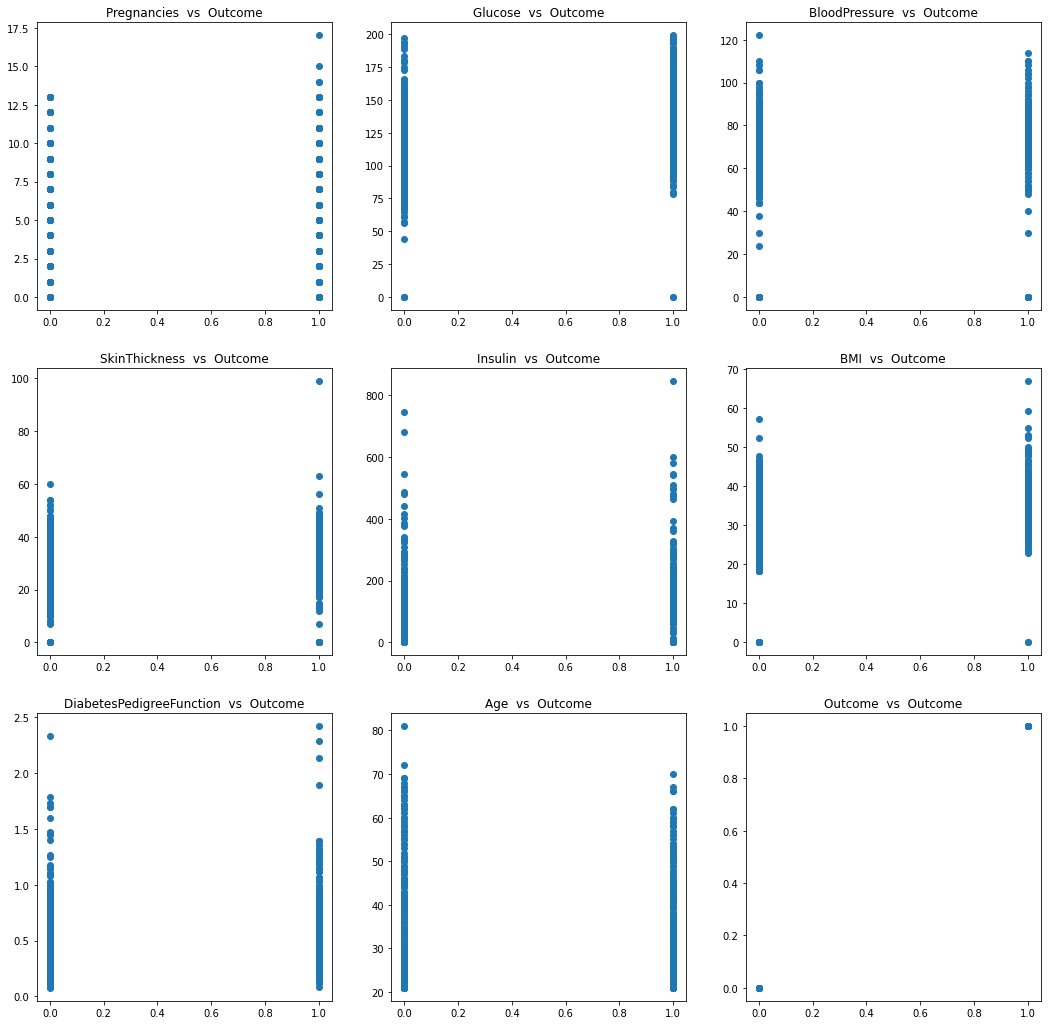

In [16]:
fig,axes=plt.subplots(3,3,figsize=(18,18))
p=0
for j in range(3):
  for k in range(3):
    axes[j][k].scatter(dataset['Outcome'],dataset[dataset.columns[p]])
    axes[j][k].set_title(dataset.columns[p]+'  vs  Outcome')
    p+=1

6.	Perform correlation analysis. Visually explore it using a heat map.

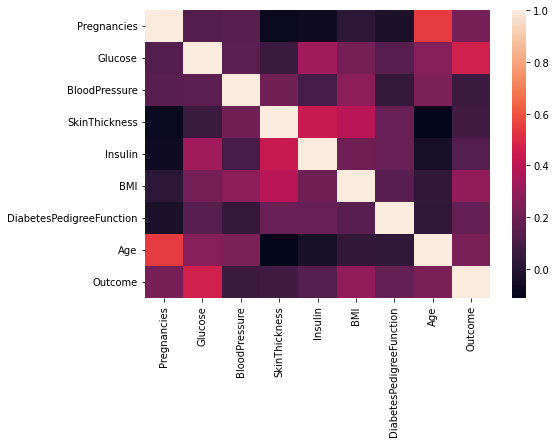

In [17]:
import seaborn as sns
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
sns.heatmap(dataset.corr())
plt.show()

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?


In [18]:
#Perform k-fold cross-validation model training and evaluate performance.  
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
def acc_score(model,x,y,p):
  cv = KFold(n_splits=p, random_state=1, shuffle=True)
  # evaluate model
  scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # report performance
  return ('Accuracy: %.3f (%.3f)' % (np.mean(scores),np.std(scores)))


8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.


In [19]:
#KNN
from sklearn.neighbors import KNeighborsClassifier as knn
classifier=knn(n_neighbors=11)
#Random forest
from sklearn.ensemble import RandomForestClassifier as rfc
Ran=rfc()
#svm
from sklearn.svm import SVC 
svc=SVC()

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_,y_,shuffle=True,test_size=0.2)

In [22]:
#Identify the best model and justify the evaluation metrics used.
for i in range(2,15): 
  print('KNN',i,'splits : ','Train_accuracy : ',acc_score(classifier,xtrain,ytrain,i),'Test_accuracy : ',acc_score(classifier,xtest,ytest,i))
  print('RFC',i,'splits : ','Train_accuracy : ',acc_score(Ran,xtrain,ytrain,i),'Test_accuracy : ',acc_score(Ran,xtest,ytest,i))
  print('SVC',i,'splits : ','Train_accuracy : ',acc_score(svc,xtrain,ytrain,i),'Test_accuracy : ',acc_score(svc,xtest,ytest,i))
  print('--------------------------------------------------------------------------------------------------')

KNN 2 splits :  Train_accuracy :  Accuracy: 0.685 (0.015) Test_accuracy :  Accuracy: 0.770 (0.020)
RFC 2 splits :  Train_accuracy :  Accuracy: 0.786 (0.011) Test_accuracy :  Accuracy: 0.795 (0.005)
SVC 2 splits :  Train_accuracy :  Accuracy: 0.715 (0.013) Test_accuracy :  Accuracy: 0.720 (0.000)
--------------------------------------------------------------------------------------------------
KNN 3 splits :  Train_accuracy :  Accuracy: 0.719 (0.010) Test_accuracy :  Accuracy: 0.705 (0.038)
RFC 3 splits :  Train_accuracy :  Accuracy: 0.797 (0.008) Test_accuracy :  Accuracy: 0.775 (0.024)
SVC 3 splits :  Train_accuracy :  Accuracy: 0.709 (0.019) Test_accuracy :  Accuracy: 0.750 (0.057)
--------------------------------------------------------------------------------------------------
KNN 4 splits :  Train_accuracy :  Accuracy: 0.719 (0.016) Test_accuracy :  Accuracy: 0.730 (0.046)
RFC 4 splits :  Train_accuracy :  Accuracy: 0.805 (0.024) Test_accuracy :  Accuracy: 0.770 (0.022)
SVC 4 spli

In [23]:
kf = KFold(n_splits=2, random_state=1, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(x_)):
  x_train,y_train=x_.iloc[train_index,:],y_.iloc[train_index]
  x_test,y_test=x_.iloc[test_index,:],y_.iloc[test_index]


In [24]:
from sklearn.metrics import accuracy_score
KNN=classifier.fit(x_train,y_train).predict(x_test)
print(accuracy_score(KNN,y_test))

0.756


In [26]:
from sklearn.metrics import classification_report,roc_auc_score
print(classification_report(KNN,y_test))
print('roc_auc_score : ',roc_auc_score(KNN, y_test))

              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       246
         1.0       0.76      0.77      0.76       254

    accuracy                           0.76       500
   macro avg       0.76      0.76      0.76       500
weighted avg       0.76      0.76      0.76       500

roc_auc_score :  0.7558094872287305


Model_selection - 2

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_,y_,shuffle=True,test_size=0.2)

In [34]:
from sklearn.metrics import accuracy_score
KNN=classifier.fit(xtrain,ytrain).predict(xtest)
print(accuracy_score(KNN,ytest))

0.785


In [35]:
from sklearn.metrics import classification_report
print(classification_report(KNN,ytest))
print('roc_auc_score : ',roc_auc_score(KNN, ytest))

              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76        85
         1.0       0.84      0.77      0.81       115

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200

roc_auc_score :  0.7869565217391306


**Preprocessing**

In [45]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler().fit_transform(xtrain)

In [46]:
from sklearn.metrics import accuracy_score
KNN=classifier.fit(scaled,ytrain).predict(xtest)
print(accuracy_score(KNN,ytest))

0.53


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
